# Assignment 1
## Benford's First Two Digits Law Implementation
### Naitik Malav-CS19BTECH11026, Jai Goyal-CS19BTECH11027

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy.stats as stats
from numpy import mean, absolute
from matplotlib.pyplot import figure

In [124]:
df = pd.read_csv('benford.csv', encoding='ISO-8859-1', engine='python')

In [125]:
df.head()

,State,City,Population
0,Alabama,Autauga County,54571
1,Alabama,Baldwin County,182265
2,Alabama,Barbour County,27457
3,Alabama,NaN,22915
4,Alabama,Blount County,57322


In [126]:
def get_FirstTwo_digit(number):
    while number>=100:
        number = int(number/10);
    return int(number)

In [127]:
def count_freq(df):
    freq = {}
    
    for x in range(9, 99):
        freq[str(x+1)] = 0
    
    for x in df['Population']:
        if x>0:
            FirstTwo_digits = get_FirstTwo_digit(x)
            freq[str(FirstTwo_digits)] += 1
    return freq

In [128]:
def benford_frequency(df):
    y = {}
    for x in range(9, 99):
        y[str(x+1)] = math.log10(1+1/(x+1))
     
    return np.array(list(y.values()))*len(df['Population'])

In [129]:
def FirstTwo_digit_benfords_law(df):
    df_freq = count_freq(df)
    benford_freq = benford_frequency(df)
    
    digits = list(df_freq.keys())
    frequency = list(df_freq.values())
    
#     print(len(digits))
#     print(len(frequency))
#     print(len(benford_freq))
    
    X = np.power(frequency-benford_freq, 2)/benford_freq
    chi_squared_value = X.sum()
    print('chi square test p value=', chi_squared_value)
    
    chi_squared_p_value = stats.chi2.sf(x=chi_squared_value, df=90)
    print("MAD=",mean(absolute(frequency - mean(frequency))))
    
    plt.figure(figsize=(20, 8))
    plt.plot(range(10, 100), frequency, label="Benford's First digit Analysis on Population", color='black', linestyle='solid', marker='o', linewidth=1)
    plt.plot(range(10, 100), benford_freq, label="Actual Benford's First Digit Analysis", color='red', linestyle='dotted', marker='o', linewidth=1)
    plt.locator_params(axis='x', nbins=10)
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

chi square test p value= 83.41617609082292
MAD= 19.744197530864188


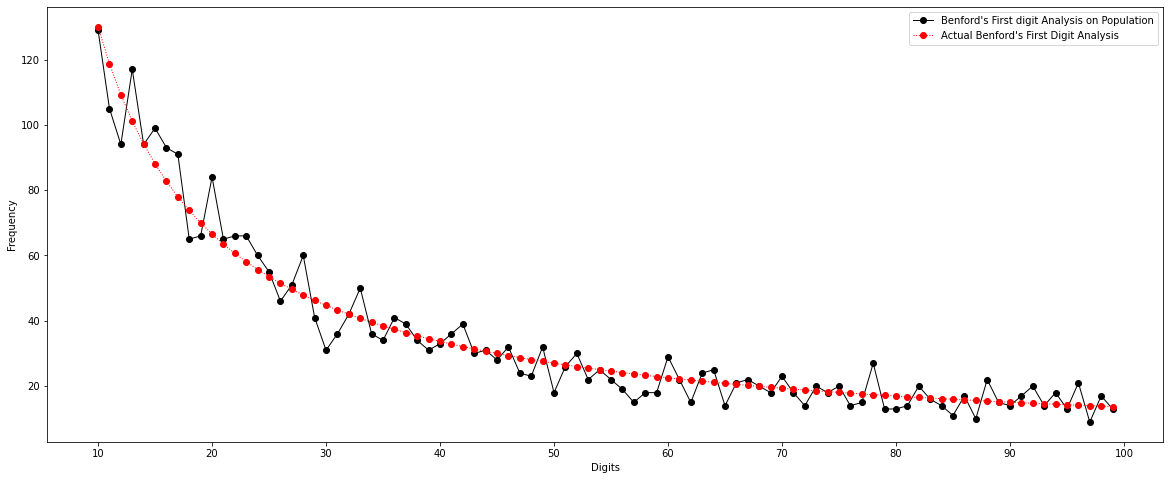

In [130]:
FirstTwo_digit_benfords_law(df)